In [130]:
import hourse_price_preprocessor

In [131]:
train_dataset_dir = "./house_price/train.csv"
test_dataset_dir = "./house_price/test.csv"

In [132]:
train_X, test_X, train_y, test_id_idx = hourse_price_preprocessor.get_train_test_split_dataset(train_dataset_dir, test_dataset_dir)

/Users/sungchulchoi/workspace/machine_learning_from_scratch_with_python/code/ch13/hourse_price_preprocessor.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_concat_numeric.drop(['MoSold'],axis=1,inplace=True)
/Users/sungchulchoi/miniconda3/envs/dl/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/sungchulchoi/workspace/machine_learning_from_scratch_with_python/code/ch13/hourse_price_preprocessor.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.

In [133]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((1460, 67), (1459, 67), (1460,), (1459,))

In [134]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.cross_validation import cross_val_score

import numpy as np

In [141]:
gbr = GradientBoostingRegressor(n_estimators=2000, subsample=0.5, max_depth=2, learning_rate=0.55)
lr = LinearRegression()

In [142]:
np.mean(cross_val_score(gbr, train_X, train_y, scoring="neg_mean_squared_error" , cv=5))

-1678923164.7247899

In [140]:
np.mean(cross_val_score(lr, train_X, train_y, scoring="neg_mean_squared_error" , cv=5))

-3.849880576538399e+33

In [40]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [42]:
from sklearn.cross_validation import train_test_split

In [143]:
gbr = GradientBoostingRegressor(
        max_depth=2, n_estimators=5000, subsample=0.5,learning_rate=0.05)
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.3)
gbr.fit(X_train, y_train)
errors_val = [rmse(y_val, y_pred) for y_pred in gbr.staged_predict(X_val)]
errors_train = [rmse(y_train, y_pred) for y_pred in gbr.staged_predict(X_train)]
x_axis = list(range(len(errors_val)))

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

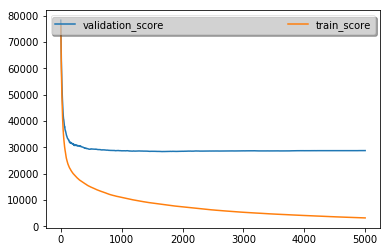

1707 28409.556524156513
29548.174263650682


In [144]:
import matplotlib.pyplot as plt
import numpy as np


ax = plt.subplot(111)
plt.plot(x_axis, errors_val, label="validation_score")
plt.plot(x_axis, errors_train, label="train_score")

leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)


plt.show()
bst_n_estimators = np.argmin(errors_val)
print(bst_n_estimators, errors_val[bst_n_estimators])
print(rmse(y_val, lr.predict(X_val)))

In [146]:
gbr_best = GradientBoostingRegressor(max_depth=2, subsample=0.5,learning_rate=0.05, n_estimators=bst_n_estimators)
gbr_best.fit(train_X, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1707, presort='auto', random_state=None,
             subsample=0.5, verbose=0, warm_start=False)

In [148]:
id_value=test_y
sales_price = gbr_best.predict(test_X)

In [149]:
result = np.vstack([id_value, sales_price]).T

result

array([[  1461.        , 130784.94456719],
       [  1462.        , 153131.01364038],
       [  1463.        , 197193.49896971],
       ...,
       [  2917.        , 195558.61678587],
       [  2918.        , 119031.22501123],
       [  2919.        , 228042.99234944]])

In [ ]:
from pandas import DataFrame

DataFrame(result, dtype=int, columns=["Id", "SalePrice"]).set_index("Id").to_csv("house_price_result.csv")
# DataFrame(result, columns=["Id", "SalePrice"]).set_index("Id").to_csv("house_price_result.csv")

In [159]:
submission_df =DataFrame(result, columns=["Id", "SalePrice"]).set_index("Id")
submission_df.index = submission_df.index.astype(int)
submission_df.to_csv("house_price_result.csv")

In [160]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f house_price_result.csv -m "My submission"

Successfully submitted to House Prices: Advanced Regression Techniques

In [122]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV 

param_grid={'n_estimators':[1000,1200,1300,1350,1360,1370,1380,1390,1400], 
                'learning_rate': [0.1, 0.05], #0.02, 0.01], 
                'subsample' : [0.4,0.5,0.55],#,0.6,0.7,0.8],
                'max_depth':[2, 4, 6],#,8], 
                'min_samples_leaf':[3, 5],#,9,15], 
                'max_features':[1.0, 0.3]#, 0.1] 
           } 
n_jobs=7 

estimator = GradientBoostingRegressor(warm_start=True)
cv = ShuffleSplit(X_train.shape[0], n_iter=5, test_size=0.2)
classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs, verbose=1)

classifier.fit(train_X, train_y)
print (classifier.best_estimator_)  

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    8.8s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   44.6s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:  1.4min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:  3.4min
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed:  6.1min
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed:  9.1min
[Parallel(n_jobs=7)]: Done 2436 tasks      | elapsed: 12.0min
[Parallel(n_jobs=7)]: Done 3186 tasks      | elapsed: 16.4min
[Parallel(n_jobs=7)]: Done 3240 out of 3240 | elapsed: 16.6min finished


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=6, max_features=0.3,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=5,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1370, presort='auto', random_state=None,
             subsample=0.55, verbose=0, warm_start=True)


In [126]:
print(rmse(y_val, classifier.best_estimator_.predict(X_val)))

1203.8283406673797


In [165]:
final_estimator = classifier.best_estimator_
final_estimator.fit(train_X, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=6, max_features=0.3,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=5,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1370, presort='auto', random_state=None,
             subsample=0.55, verbose=0, warm_start=True)

In [169]:
id_value=test_y
sales_price = final_estimator.predict(test_X)
result = np.vstack([id_value, sales_price]).T
submission_df =DataFrame(result, columns=["Id", "SalePrice"]).set_index("Id")
submission_df.index = submission_df.index.astype(int)
submission_df.to_csv("house_price_result_grid_search.csv")


In [170]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f house_price_result_grid_search.csv -m "Message"

Successfully submitted to House Prices: Advanced Regression Techniques